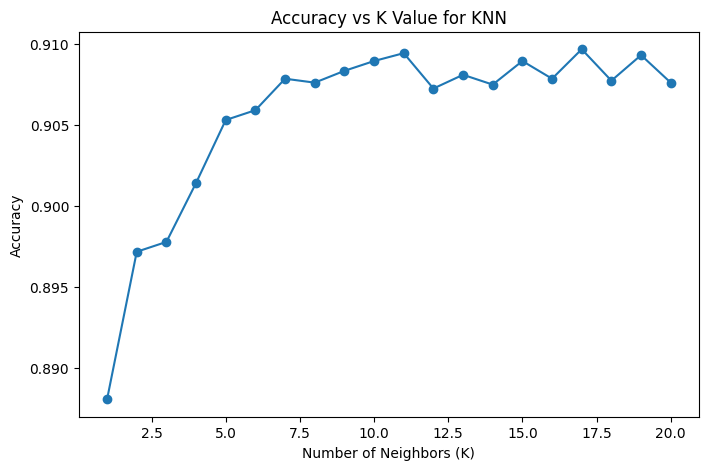

Optimal K value: 17

===== KNN MODEL PERFORMANCE =====
Accuracy: 0.9097

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.69      0.36      0.47       928

    accuracy                           0.91      8238
   macro avg       0.81      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238



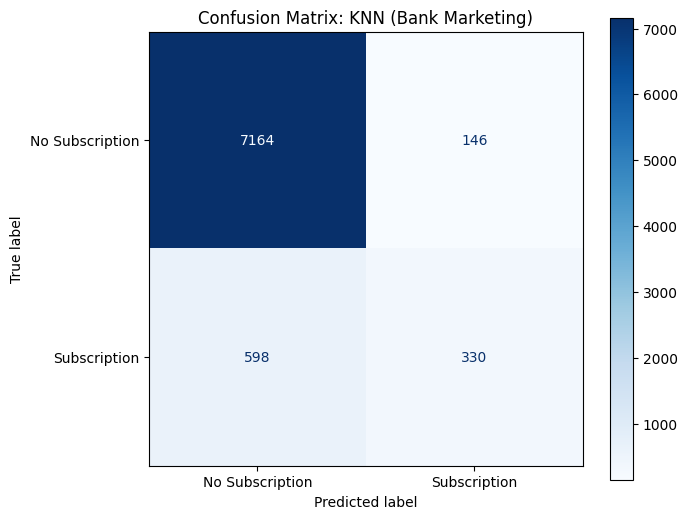

In [ ]:
# =========================================
# Experiment 4: K-Nearest Neighbors (KNN)
# Bank Marketing Dataset
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ---------- Load Dataset ----------
df = pd.read_csv("bank.csv", sep=';')

# ---------- Data Preprocessing ----------
# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# ---------- Features and Target ----------
X = df.drop("y", axis=1)
y = df["y"]

# ---------- Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- Feature Scaling (MANDATORY for KNN) ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- Selecting Optimal K ----------
accuracy_scores = []

k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# ---------- Accuracy vs K Plot ----------
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value for KNN")
plt.show()

# ---------- Best K ----------
best_k = k_range[np.argmax(accuracy_scores)]
print(f"Optimal K value: {best_k}")

# ---------- Final KNN Model ----------
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# ---------- Prediction ----------
y_pred = knn_final.predict(X_test_scaled)

# ---------- Model Evaluation ----------
print("\n===== KNN MODEL PERFORMANCE =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ---------- Confusion Matrix ----------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Subscription", "Subscription"]
)

fig, ax = plt.subplots(figsize=(7, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix: KNN (Bank Marketing)")
plt.show()
